# Simulate $R^2$ distribution by derivative

This figure is modeled on https://events.neurolibre.org/myelin-meta-analysis/02/closer_look.html#figure-3.

In [1]:
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import seaborn as sns

In [2]:
measures = {
    "Diffusion": [
        "AD",
        "AWF",
        "FA",
        "MD",
        "MK",
        "RD",
        "RDe",
        "RK",
    ],
    "Magnetization transfer": [
        "MTR",
        "ihMTR",
    ],
    "T1 relaxometry": [
        "T1",
    ],
    "T1w/T2w": [
        "Mw",
        "Mwc",
    ],
    "Quantitative Susceptibility Mapping": [
        "X-sep",
        "X-sep+R2'",
    ],
}
N_SUBJECTS = 10
n_metrics = np.sum([len(v) for v in measures.values()])

In [3]:
means = np.random.random(size=n_metrics)
sds = np.random.random(n_metrics)
measure_counter = 0
dfs = []
for modality, derivatives in measures.items():
    for derivative in derivatives:
        mean = means[measure_counter]
        sd = sds[measure_counter]
        measure_df = pd.DataFrame(columns=["participant_id", "Modality", "Measure", "Correlation"])
        values = np.ones(N_SUBJECTS) * -9999
        while np.min(values) <= 0 or np.max(values) >= 1:
            values = np.random.normal(loc=mean, scale=sd, size=N_SUBJECTS)

        measure_df["Correlation"] = values
        measure_df["participant_id"] = np.arange(1, N_SUBJECTS + 1, dtype=int)
        measure_df["Modality"] = modality
        measure_df["Measure"] = derivative.replace(" ", "\n")
        dfs.append(measure_df)
        measure_counter += 1

measures_df = pd.concat(dfs)

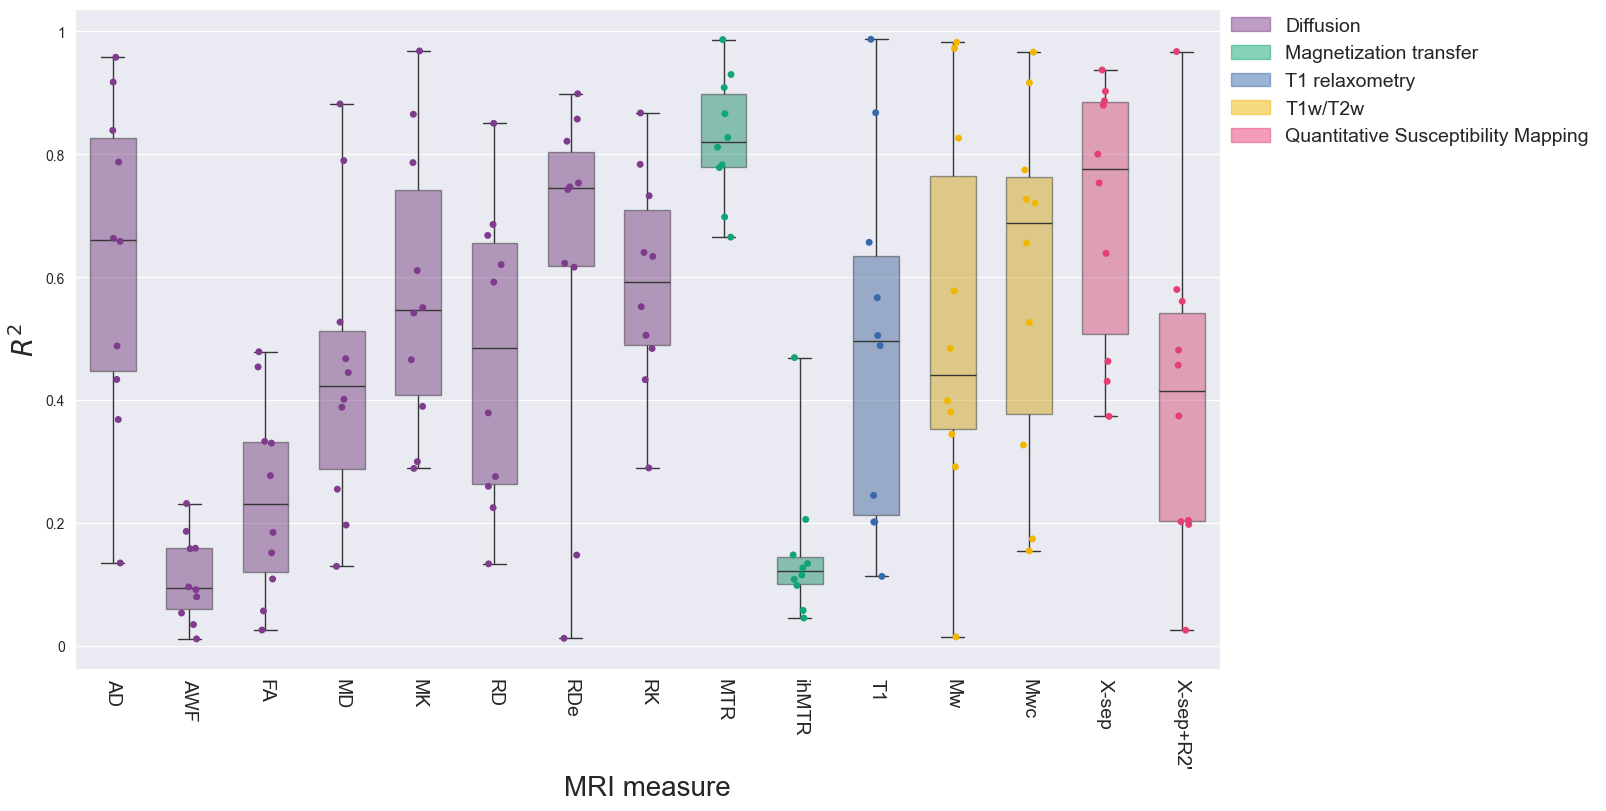

In [4]:
sns.set_style("darkgrid")
palette = [
    (127, 60, 141),
    (17, 165, 121),
    (57, 105, 172),
    (242, 183, 1),
    (231, 63, 116),
]
palette = [[i / 256 for i in m] for m in palette]
fig, ax = plt.subplots(figsize=(16, 8), layout="constrained")
sns.boxplot(
    data=measures_df,
    x="Measure",
    y="Correlation",
    hue="Modality",
    whis=(0, 100),
    ax=ax,
    gap=0.25,
    fill=True,
    legend=False,
    palette=palette,
    boxprops={"alpha": 0.5},
)
sns.stripplot(
    data=measures_df,
    x="Measure",
    y="Correlation",
    hue="Modality",
    ax=ax,
    legend=False,
    jitter=True,
    palette=palette,
    alpha=1,
)
ax.tick_params(axis="x", rotation=270, labelsize=14)
ax.set_xlabel("MRI measure", fontsize=20)
ax.set_ylabel(r"$R^2$", fontsize=20)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1"])

handles = []
for i_mod, mod in enumerate(measures_df["Modality"].unique()):
    color = palette[i_mod]
    patch = mpatches.Patch(color=color, alpha=0.5, label=mod)
    handles.append(patch)

with sns.axes_style("white"):
    legend = fig.legend(handles=handles, loc='outside right upper', fontsize=14)
    frame = legend.get_frame()
    frame.set_edgecolor("white")

fig.savefig("../figures/r2_by_modality.png")